In [1]:
import pandas as pd
import numpy as np
from word import Word
%load_ext autoreload
%autoreload 2

In [3]:
datatype = {'round': str, 
            'session': str, 
            'participant': str,
            'line_part': str,
            'stimuli_image': str,
            'stimuli_text': str,
            'duration': 'int64',
            'x_cord': 'float64',
            'y_cord': 'float64',
            'aoi_x': 'float64',
            'aoi_y': 'float64', 
            'aoi_width': 'float64', 
            'aoi_height': 'float64',
            'token': str,
            'length': 'int64'}

df = df.astype(datatype)

In [12]:
df.to_csv('freq_result.csv')

In [44]:
from word import Word
from tqdm import tqdm

In [72]:
lexicon = {}

participants = {}

for row in tqdm(df.iterrows()):
    
    index = row[0]
    cols = row[1]
    
    round_id = index[0]
    session_id = index[1]
    file_id = round_id + session_id
    
    participant_id = index[2:5]
    
    line_part = cols['line_part']
    _, line_id, _, part_id = line_part.split()
    
    timestamp = cols['timestamp']
    duration = cols['duration']
    length = cols['length']
    frequency = cols['CobMln']
    predict = 0
    level = 0
    
    token = cols['token']
    
    key = f'{file_id}_{line_id}_{part_id}_{participant_id}'
    
    if lexicon.get(key, 0) == 0:
        lexicon[key] = Word(file_id, line_part, token)
        
    lexicon[key].add(participant=participant_id, 
                     duration=duration, 
                     start_time=timestamp, 
                     length=length, 
                     freq=frequency, 
                     predict=predict,
                     level=level)
    
    if participants.get(file_id, 0) == 0:
        participants[file_id] = []
    
    if participant_id not in participants[file_id]:
        participants[file_id].append(participant_id)

537666it [00:42, 12728.76it/s]


In [57]:
import json
j = json.dumps(participants)
with open('participants.txt', 'w') as file:
    file.write(j)

In [73]:
headers = ['file',
           'line',
           'part',
           'token',
           'subject',
           'SFD',
           'FFD',
           'GD',
           'TT',
           'PrF',
           'Pr1',
           'Pr2',
           'PrS',
           'freq',
           'length']

result = pd.DataFrame(columns=headers)

In [76]:
for key, word in tqdm(lexicon.items()):
    file, line, part, subject = key.split('_')
    token = word.get_text()
    SFD = word.single_fix_duration()
    FFD = word.first_fix_duration()
    GD = word.gaze_duration()
    TT = word.total_time()
    PrF = word.fix_probability()
    Pr1 = word.prob_of_one_fix()
    Pr2 = word.prob_of_2_or_more_fix()
    PrS = word.prob_of_skip()
    freq = word.get_freq()
    length = word.get_leng()
    
    values = [file, line, part, token, subject, SFD, FFD, GD, TT, PrF, Pr1, Pr2, PrS, freq, length]
    
    dic = dict(zip(headers, values))
    
    result = result.append(dic, ignore_index=True)

100%|█████████████████████████████████| 230091/230091 [1:12:25<00:00, 52.95it/s]


In [79]:
result.to_csv('Eight_Metrics.csv', index=False)

# Add normalize metrics
# Inspect length

In [2]:
import pandas as pd

df = pd.read_csv('Eight_Metrics.csv')

df = df.dropna(subset=['token'])

df['nSFD'] = df.loc[:,'SFD'] / df['length']
df['nFFD'] = df.loc[:,'FFD'] / df['length']
df['nGD'] = df.loc[:,'GD'] / df['length']
df['nTT'] = df.loc[:,'TT'] / df['length']

df00

,file,line,part,token,subject,SFD,FFD,GD,TT,PrF,Pr1,Pr2,PrS,freq,length,nSFD,nFFD,nGD,nTT
0,11,12,3,brought,1,NaN,120.0,120.0,836.0,0.00,0.00,0.00,1.00,50,7,NaN,17.142857,17.142857,119.428571
1,11,13,3,broker,1,NaN,120.0,120.0,700.0,0.00,0.00,0.00,1.00,3,6,NaN,20.000000,20.000000,116.666667
2,11,12,4,to,1,NaN,161.0,161.0,353.0,0.00,0.00,0.00,1.00,19942,2,NaN,80.500000,80.500000,176.500000
3,11,13,4,to,1,161.0,161.0,161.0,161.0,0.00,0.00,0.00,1.00,19942,2,80.50,80.500000,80.500000,80.500000
4,11,12,5,arrange,1,NaN,74.0,74.0,695.0,0.00,0.00,0.00,1.00,7,7,NaN,10.571429,10.571429,99.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230685,92,24,8,of,314,NaN,267.0,267.0,732.0,0.07,0.00,0.07,0.93,30106,2,NaN,133.500000,133.500000,366.000000
230686,92,25,5,of,314,NaN,267.0,267.0,829.0,0.07,0.00,0.07,0.93,30106,2,NaN,133.500000,133.500000,414.500000
230687,92,25,1,in,314,NaN,136.0,136.0,363.0,0.07,0.00,0.07,0.93,18464,2,NaN,68.000000,68.000000,181.500000
230688,92,3,3,if,314,NaN,181.0,181.0,363.0,0.07,0.00,0.07,0.93,3006,2,NaN,90.500000,90.500000,181.500000


In [8]:
import pandas as pd

df = pd.read_csv('datasets/Eight_Metrics.csv')

df = df.dropna(subset=['token'])

(array([ 83994., 110839.,  15465.,      0.,  16485.,      0.,      0.,
             0.,      0.,   3769.]),
 array([0.   , 0.007, 0.014, 0.021, 0.028, 0.035, 0.042, 0.049, 0.056,
        0.063, 0.07 ]),
 <BarContainer object of 10 artists>)

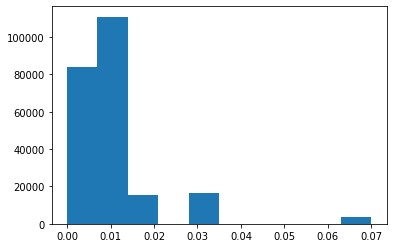

In [14]:
import matplotlib.pyplot as plt
plt.hist(df.PrF.tolist())

In [4]:
df = pd.read_csv('freq_result.csv')

In [5]:
df

,index,round,session,participant,line_part,stimuli_image,stimuli_text,timestamp,duration,x_cord,y_cord,aoi_x,aoi_y,aoi_width,aoi_height,token,length,CobMln
0,11001_0,1,1,1,line 12 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,263.0,120,722.360000,488.112500,700.5,467.0,102.0,32.0,brought,7,50
1,11001_1,1,1,1,line 13 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,263.0,120,722.360000,488.112500,708.5,500.0,96.0,32.0,broker,6,3
2,11001_2,1,1,1,line 12 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,519.0,255,736.400394,491.933725,700.5,467.0,102.0,32.0,brought,7,50
3,11001_3,1,1,1,line 13 part 3,TEX_R1S1_bg.png,TEX_R1S1_text.txt,519.0,255,736.400394,491.933725,708.5,500.0,96.0,32.0,broker,6,3
4,11001_4,1,1,1,line 12 part 4,TEX_R1S1_bg.png,TEX_R1S1_text.txt,698.0,161,809.180746,494.226708,803.5,467.0,28.0,32.0,to,2,19942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537661,92314_304,9,2,314,line 7 part 5,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59424.0,70,1043.085715,265.241425,928.5,269.0,159.0,32.0,every,5,546
537662,92314_305,9,2,314,line 6 part 6,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59573.0,148,1046.345271,264.358783,946.5,236.0,130.0,32.0,frequently,10,58
537663,92314_306,9,2,314,line 7 part 5,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59573.0,148,1046.345271,264.358783,928.5,269.0,159.0,32.0,every,5,546
537664,92314_307,9,2,314,line 6 part 7,TEX_R9S2_bg.png,TEX_R9S2_text.txt,59946.0,364,1081.592856,260.325826,1077.5,236.0,65.0,32.0,finds,5,35


In [1]:
round_id = 1
session_id = 1

with open(f'datasets/GazeBase_TEX/StimuliExamples/TEXTexts/TEX_R{round_id}S{session_id}_text.txt') as file:
    lines = [line for line in file.readlines() if line != '\n']
    if block == 1:
        return len(lines[0].split())
    else:
        start = (block - 1) * 4 -2
        
        return sum(len(line.split()) for line in lines[start : start + 5])

In [5]:
lst = [line for line in lst if line != '\n']

In [6]:
lst

['THE LANDING\n',
 '"Just the place for a Snark!" the Bellman cried,\n',
 'As he landed his crew with care;\n',
 'Supporting each man on the top of the tide\n',
 'By a finger entwined in his hair.\n',
 '"Just the place for a Snark! I have said it twice:\n',
 'That alone should encourage the crew.\n',
 'Just the place for a Snark! I have said it thrice:\n',
 'What I tell you three times is true."\n',
 'The crew was complete: it included a Boots--\n',
 'A maker of Bonnets and Hoods\n',
 'A Barrister, brought to arrange their disputes--\n',
 'And a Broker, to value their goods.\n',
 'A Billiard-marker, whose skill was immense,\n',
 'Might perhaps have won more than his share--\n',
 'But a Banker, engaged at enormous expense,\n',
 'Had the whole of their cash in his care.\n',
 'There was also a Beaver, that paced on the deck,\n',
 'Or would sit making lace in the bow:\n',
 'And had often (the Bellman said) saved them from wreck,\n',
 'Though none of the sailors knew how.\n',
 'There was on